In [1]:
import sklearn
import numpy as np
import pandas as pd

In [2]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Activation
from tensorflow.keras.callbacks import ReduceLROnPlateau


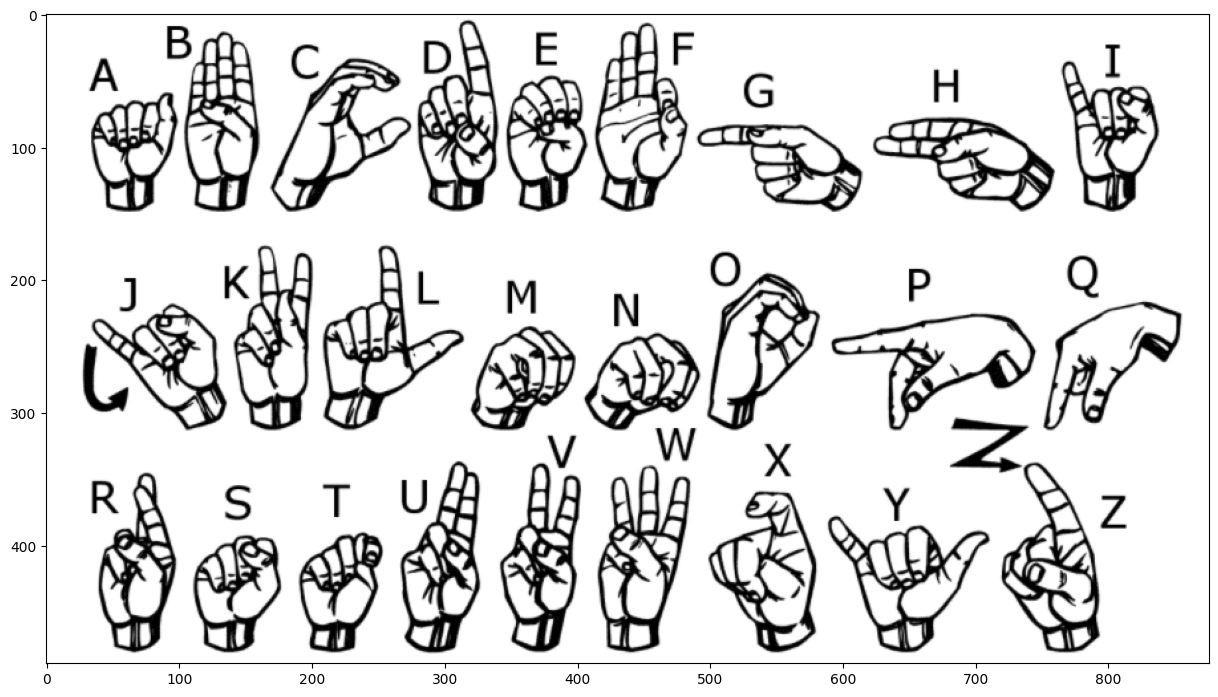

In [4]:
img = mpimg.imread("/american_sign_language.png")
plt.figure(figsize = (15, 12))
plt.imshow(img)

In [5]:
sig_labels = {}
letras = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"
for i in range (26):
    sig_labels[i] = letras[i]


In [6]:
train_val_set = pd.read_csv("/sign_mnist_train.csv")

train_val_y_df = train_val_set["label"]
train_val_X_df = train_val_set.drop("label", axis = "columns")

train_val_y = train_val_y_df.to_numpy()
train_val_X = train_val_X_df.to_numpy()

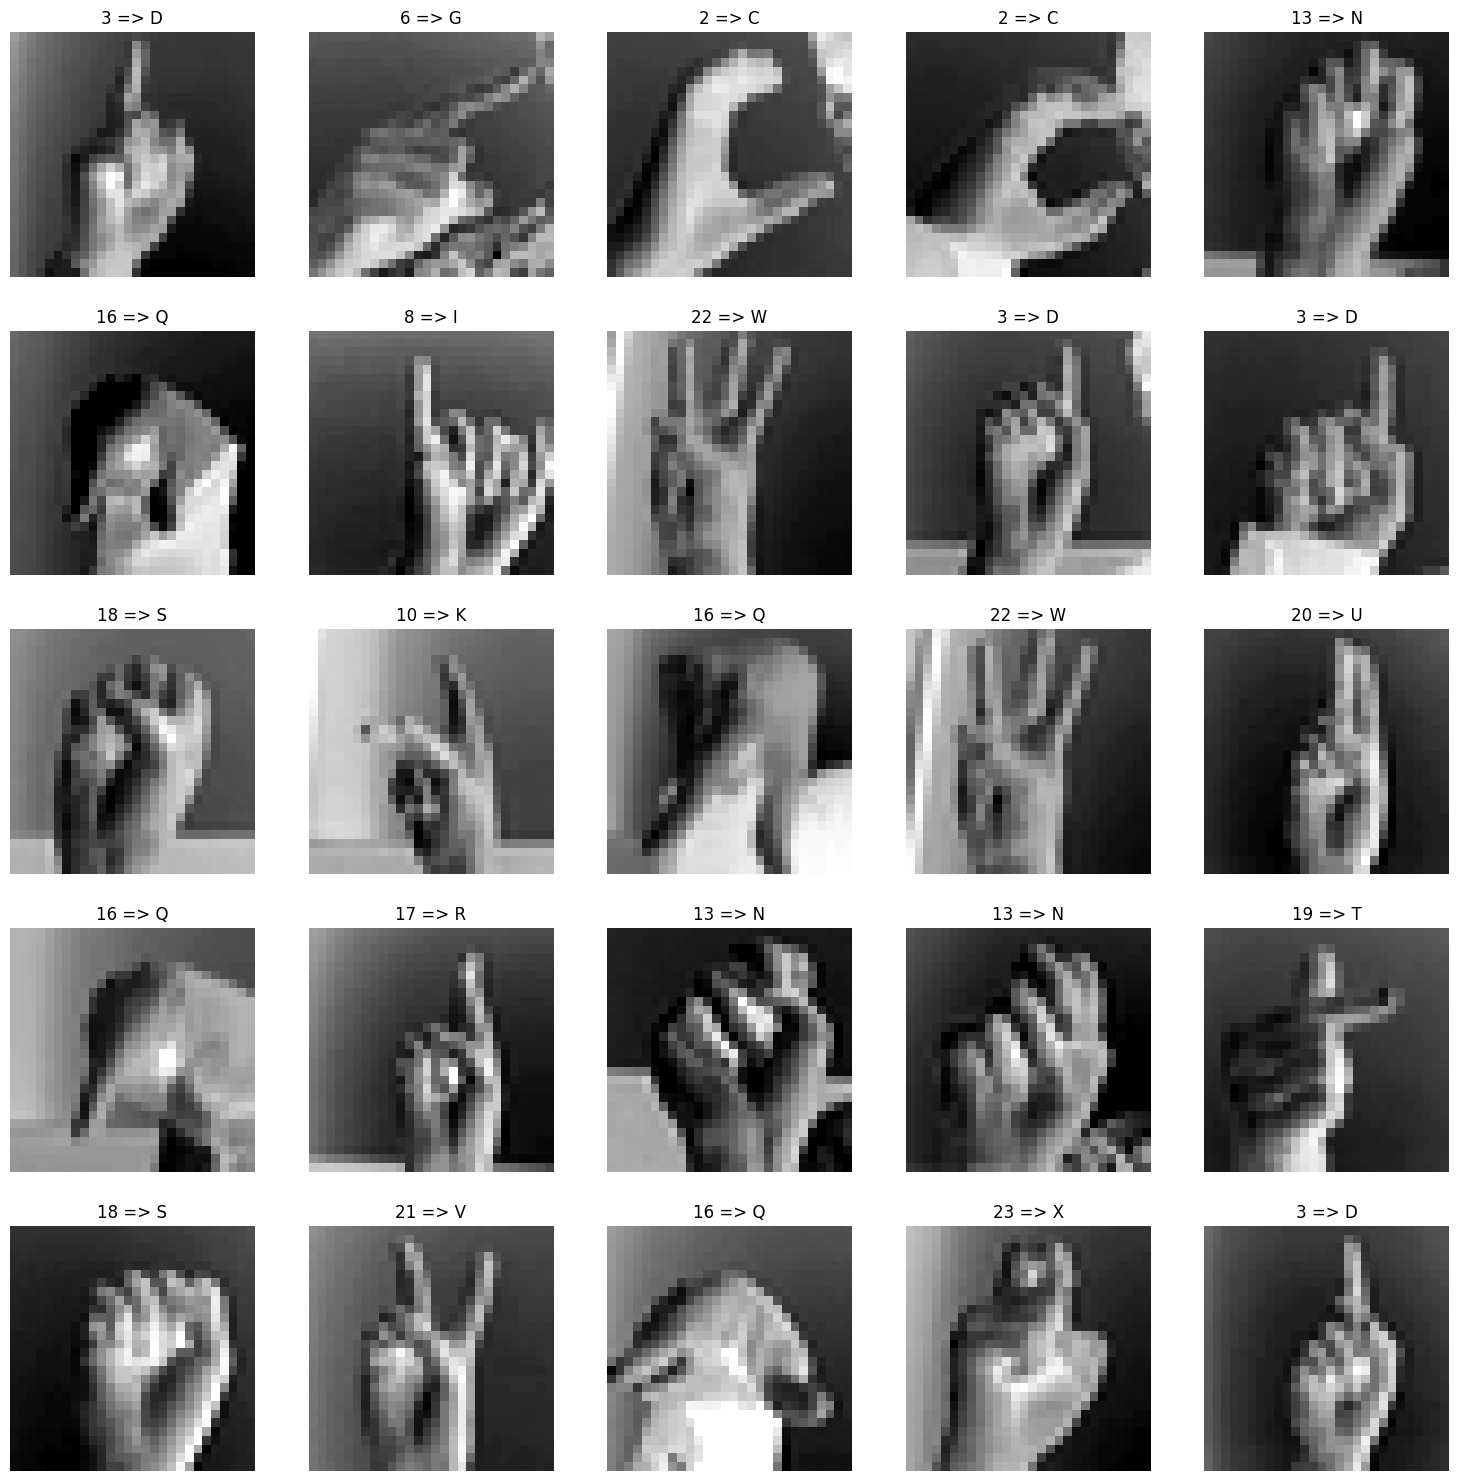

In [7]:
examples25 = train_val_X[0 : 25]

figs, axs = plt.subplots(5, 5, figsize = (15, 15))
contr = 0 # row
contc = 0 # column
figs.tight_layout(pad = 0.5)
for i in range(25):
    axs[contr, contc].imshow(examples25[i].reshape(28, 28), cmap = mpl.cm.binary)
    axs[contr, contc].set_title("%s => %s" %(train_val_y[i], sig_labels[train_val_y[i]]))
    axs[contr, contc].axis("off")
    contc += 1
    if contc == 5:
        contr += 1
        contc = 0

In [8]:
train_val_X_for_extension = train_val_X.reshape(27455, 28, 28, 1).copy()

In [9]:
datagen1 = ImageDataGenerator(width_shift_range = 0.15, height_shift_range = 0.1)
X_new_1_raw = datagen1.flow(train_val_X_for_extension, shuffle = False, batch_size = 27455)

datagen2 = ImageDataGenerator(rotation_range = 20)
X_new_2_raw = datagen2.flow(train_val_X_for_extension, shuffle = False, batch_size = 27455)

In [10]:
X_new_1 = X_new_1_raw[0].copy()
X_new_2 = X_new_2_raw[0].copy()

In [11]:
X_train_val_extended = np.concatenate((train_val_X_for_extension, X_new_1, X_new_2), axis = 0)
y_train_val_extended = np.concatenate((train_val_y, train_val_y, train_val_y))

In [12]:
X_train_val_extended.shape, y_train_val_extended.shape

((82365, 28, 28, 1), (82365,))

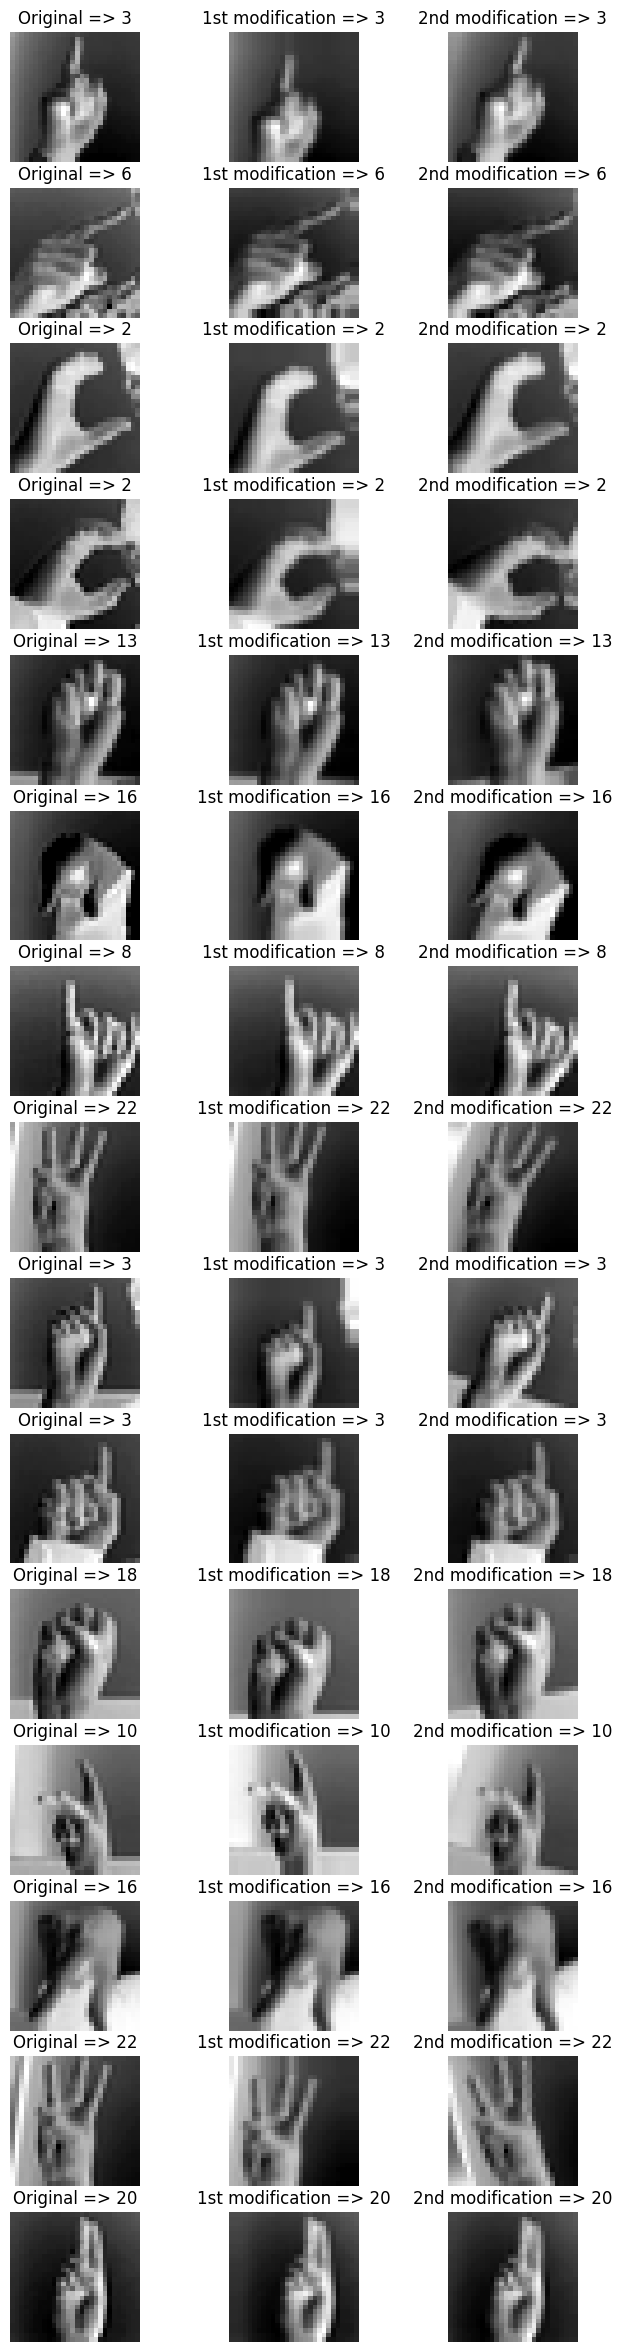

In [13]:
figs, axs = plt.subplots(15, 3, figsize = (8, 30))
contf = 0
contc = 0

for i in range(15):

    axs[i, 0].imshow(X_train_val_extended[i], cmap = mpl.cm.binary)
    axs[i, 0].axis("off")

    axs[i, 1].imshow(X_train_val_extended[27455 + i], cmap = mpl.cm.binary)
    axs[i, 1].axis("off")

    axs[i, 2].imshow(X_train_val_extended[27455 * 2 + i], cmap = mpl.cm.binary)
    axs[i, 2].axis("off")

    axs[i, 0].set_title("Original => %s" %(y_train_val_extended[i]))
    axs[i, 1].set_title("1st modification => %s" %(y_train_val_extended[27455 + i]))
    axs[i, 2].set_title("2nd modification => %s" %(y_train_val_extended[27455 * 2 + i]))


In [14]:
X_train_val_sf , y_train_val_sf = shuffle(X_train_val_extended, y_train_val_extended)

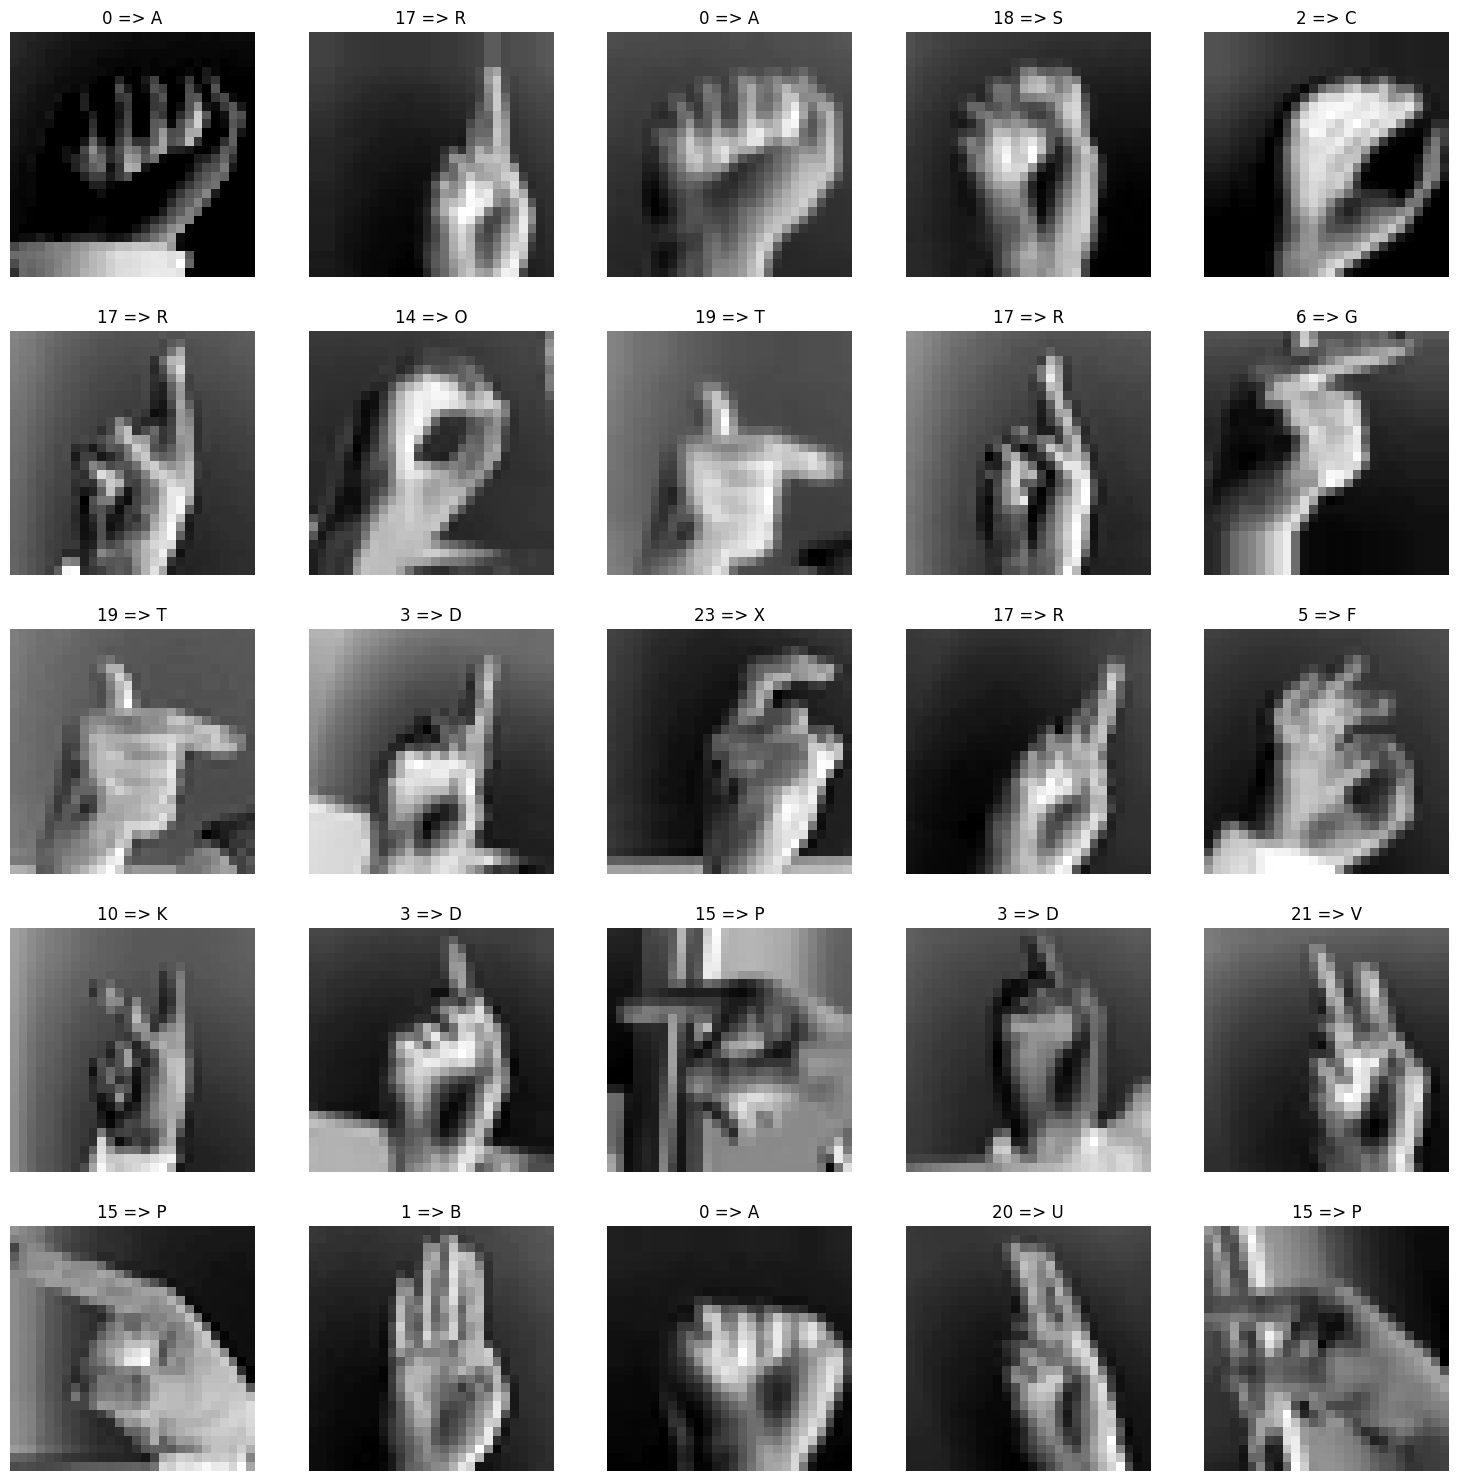

In [15]:
figs, axs = plt.subplots(5, 5, figsize = (15, 15))
contr = 0
contc = 0
figs.tight_layout(pad = 0.5)
for i in range(25):
    axs[contr, contc].imshow(X_train_val_sf[i], cmap = mpl.cm.binary)
    axs[contr, contc].set_title("%s => %s" %(y_train_val_sf[i], sig_labels[y_train_val_sf[i]]))
    axs[contr, contc].axis("off")
    contc += 1
    if contc == 5:
        contr += 1
        contc = 0

In [16]:
X_train = X_train_val_sf[0 : 75000].copy().reshape(75000, 784) / 255.0
y_train = y_train_val_sf[0 : 75000].copy()

X_val = X_train_val_sf[75000 : ].copy().reshape(82365 - 75000, 784) / 255.0
y_val = y_train_val_sf[75000 :].copy()


In [17]:
DNN = Sequential([

    Dense(units = 400, kernel_initializer = "lecun_normal",
          use_bias = False, input_shape = [784]),
    # use bias can be set to false since we will later add a batch normalization layer
    # use bias puede ser falso ya que luego vamos a añadir capasa de BN

    BatchNormalization(),

    Activation("selu"),



    Dense(units = 400, kernel_initializer = "lecun_normal",
        use_bias = False),
    # use bias can be set to false since we will later add a batch normalization layer
    # use bias puede ser falso ya que luego vamos a añadir capasa de BN

    BatchNormalization(),

    Activation("selu"),



    Dense(units = 400, kernel_initializer = "lecun_normal",
         use_bias = False),
    # use bias can be set to false since we will later add a batch normalization layer
    # use bias puede ser falso ya que luego vamos a añadir capasa de BN

    BatchNormalization(),

    Activation("selu"),



    Dense(units = 400, kernel_initializer = "lecun_normal",
          use_bias = False),
    # use bias can be set to false since we will later add a batch normalization layer
    # use bias puede ser falso ya que luego vamos a añadir capasa de BN

    BatchNormalization(),

    Activation("selu"),



    Dense(units = 400, kernel_initializer = "lecun_normal",
          use_bias = False),
    # use bias can be set to false since we will later add a batch normalization layer
    # use bias puede ser falso ya que luego vamos a añadir capasa de BN

    BatchNormalization(),

    Activation("selu"),



    Dense(units = 25, activation = "softmax",
          kernel_initializer = "glorot_uniform")


])


In [18]:
DNN.compile(optimizer = "nadam",
             loss = "sparse_categorical_crossentropy",
             metrics = ["accuracy"])

In [19]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("Modelos/DNN.h5")
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 8, restore_best_weights = True)
lr_scheduler = ReduceLROnPlateau(factor = 0.5, patience = 5,
                                 verbose = 1, monitor = "val_accuracy")


In [20]:
DNN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 400)               313600    
                                                                 
 batch_normalization (BatchN  (None, 400)              1600      
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 400)               0         
                                                                 
 dense_1 (Dense)             (None, 400)               160000    
                                                                 
 batch_normalization_1 (Batc  (None, 400)              1600      
 hNormalization)                                                 
                                                                 
 activation_1 (Activation)   (None, 400)               0

In [21]:
history_DNN = DNN.fit(X_train, y_train, epochs = 100,
                        validation_data = (X_val, y_val),
                        callbacks = [checkpoint_cb, early_stopping_cb, lr_scheduler])


Epoch 1/100
2344/2344 [==============================] - 43s 13ms/step - loss: 0.9327 - accuracy: 0.7148 - val_loss: 1.7039 - val_accuracy: 0.5506 - lr: 0.0010
Epoch 2/100
2344/2344 [==============================] - 24s 10ms/step - loss: 0.4457 - accuracy: 0.8597 - val_loss: 3.0599 - val_accuracy: 0.4443 - lr: 0.0010
Epoch 3/100
2344/2344 [==============================] - 24s 10ms/step - loss: 0.3080 - accuracy: 0.9023 - val_loss: 2.1452 - val_accuracy: 0.5050 - lr: 0.0010
Epoch 4/100
2344/2344 [==============================] - 25s 11ms/step - loss: 0.2393 - accuracy: 0.9231 - val_loss: 2.3635 - val_accuracy: 0.5113 - lr: 0.0010
Epoch 5/100
2344/2344 [==============================] - 24s 10ms/step - loss: 0.1957 - accuracy: 0.9359 - val_loss: 1.5770 - val_accuracy: 0.6130 - lr: 0.0010
Epoch 6/100
2344/2344 [==============================] - 23s 10ms/step - loss: 0.1605 - accuracy: 0.9468 - val_loss: 0.9930 - val_accuracy: 0.7608 - lr: 0.0010
Epoch 7/100
2344/2344 [=================

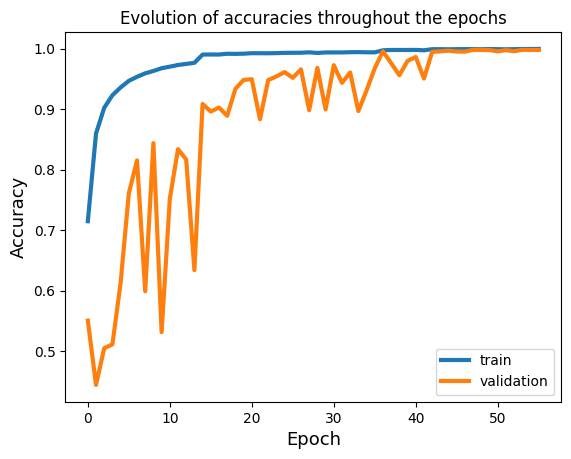

<Figure size 1500x900 with 0 Axes>

In [22]:
plt.plot(history_DNN.history['accuracy'], linewidth = 3)
plt.plot(history_DNN.history['val_accuracy'], linewidth = 3)
#plt.plot(history_DNN.history['loss'], linewidth = 1)
#plt.plot(history_DNN.history['val_loss'], linewidth = 1)
plt.title('Evolution of accuracies throughout the epochs')
plt.ylabel('Accuracy', fontsize = 13)
plt.xlabel('Epoch', fontsize = 13)
plt.legend(['train', 'validation'], loc='lower right')
plt.figure(figsize=(15,9))
plt.show()

In [24]:
DNN.evaluate(X_train, y_train), DNN.evaluate(X_val, y_val)

231/231 [==============================] - 1s 3ms/step - loss: 0.0066 - accuracy: 0.9981


([6.529284291900694e-05, 1.0], [0.006565829273313284, 0.9980990886688232])

In [25]:
test_set = pd.read_csv("/sign_mnist_test.csv")

test_y_df = test_set["label"]
test_X_df = test_set.drop("label", axis = "columns")

test_y = test_y_df.to_numpy()
test_X = test_X_df.to_numpy()

In [26]:
test_X.shape, test_y.shape

((7172, 784), (7172,))

In [27]:
X_test = test_X.copy() / 255.0
y_test = test_y.copy()


In [28]:
DNN.evaluate(X_test, y_test)

225/225 [==============================] - 1s 4ms/step - loss: 0.1087 - accuracy: 0.9795


[0.1087343692779541, 0.9795036315917969]

In [29]:
pred_DNN = np.argmax(DNN.predict(X_test), axis = 1)

225/225 [==============================] - 2s 5ms/step


In [30]:
conf_mx = confusion_matrix(y_test, pred_DNN)

In [31]:
row_sums = conf_mx.sum(axis = 1, keepdims = True)
norm_conf_mx = conf_mx / row_sums
np.fill_diagonal(norm_conf_mx, 0)

<ipython-input-32-bb324b6a06a4>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)
<ipython-input-32-bb324b6a06a4>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels)


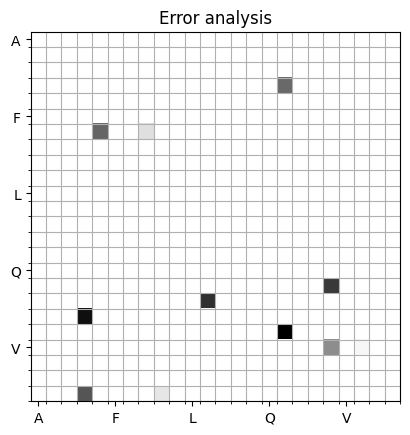

<Figure size 2000x2000 with 0 Axes>

In [32]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
minor_tick = [0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5,
              11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5,
              20.5, 21.5, 22.5, 23.5, 24.5]
ax.set_xticks(minor_tick, minor=True)
ax.set_yticks(minor_tick, minor=True)
ax.imshow(norm_conf_mx, cmap = plt.cm.gray.reversed())

labels = list("AAFLQV")
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)

ax.grid(which='minor', alpha=1)

plt.title("Error analysis")
plt.figure(figsize = (20, 20))
plt.show()

In [37]:
DNN.save("/DNN_definitive.h5")
